In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv',index_col='id')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [5]:
df.shape

(5110, 11)

In [6]:
df.isnull().sum().sort_values(ascending=False).head(8)

bmi               201
age                 0
gender              0
hypertension        0
heart_disease       0
work_type           0
ever_married        0
Residence_type      0
dtype: int64

<Axes: ylabel='Frequency'>

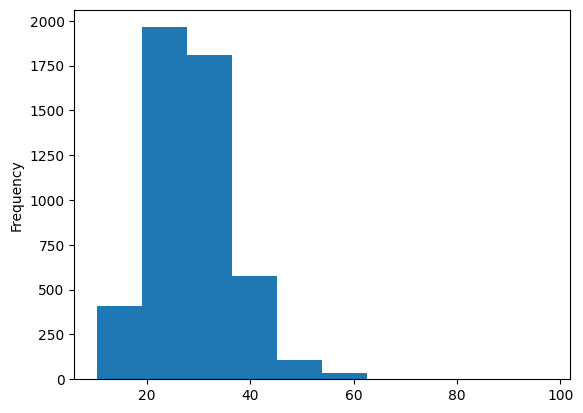

In [7]:
df['bmi'].plot(kind='hist')

In [8]:
df['bmi'].skew()

np.float64(1.0553402052962912)

In [9]:
df['bmi'].mean()

np.float64(28.893236911794666)

In [10]:
df['bmi'].median()

np.float64(28.1)

In [11]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='median')

df['bmi'] = impute.fit_transform(df[['bmi']])
#df['bmi'] = impute.transform(df[['bmi']])

In [12]:
df.isnull().sum().sort_values(ascending=False).head(10)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [14]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [15]:
num_cols = [ 'age', 'hypertension', 'heart_disease',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke']

In [16]:
df.select_dtypes(include='object').columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

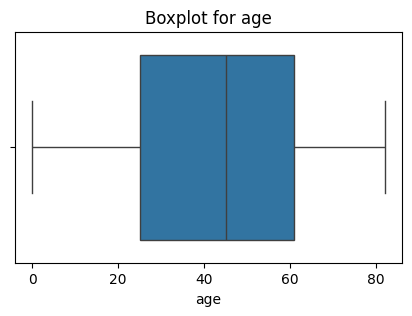

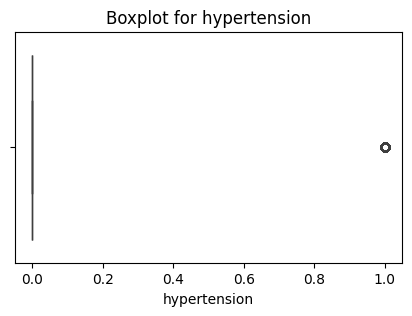

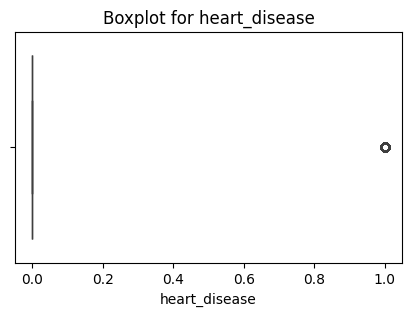

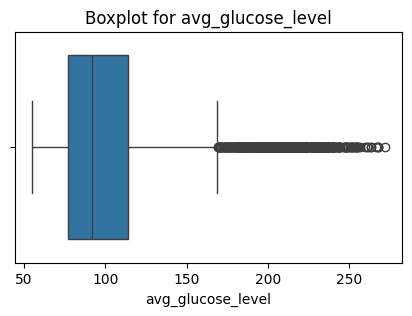

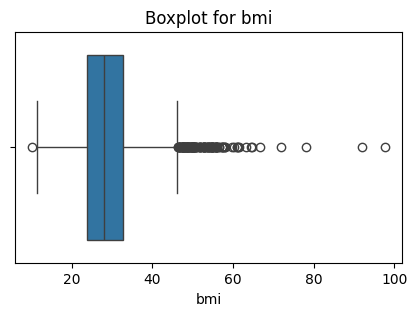

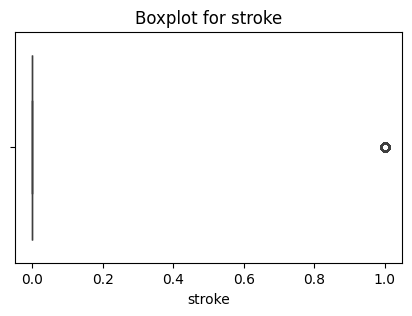

In [17]:
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [18]:
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_counts[col] = count

print(outlier_counts)

{'age': 0, 'hypertension': 498, 'heart_disease': 276, 'avg_glucose_level': 627, 'bmi': 126, 'stroke': 249}


In [19]:
import numpy as np


cols_to_fix = ['avg_glucose_level', 'bmi']

for col in cols_to_fix:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR


    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))


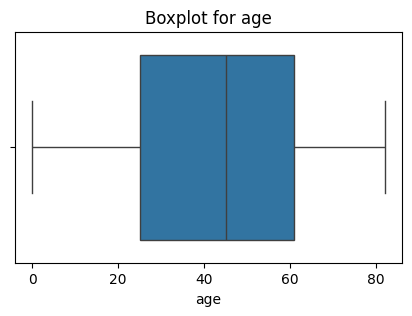

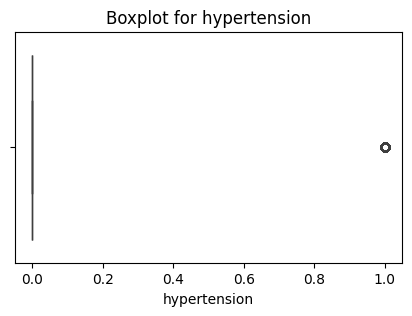

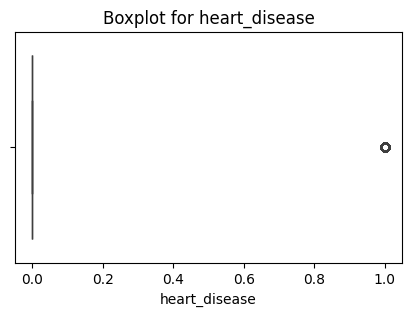

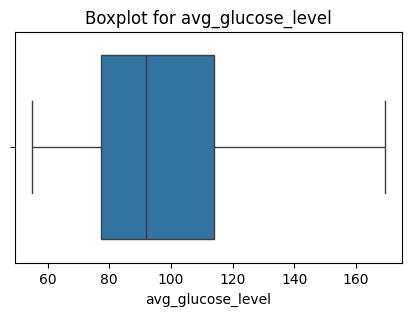

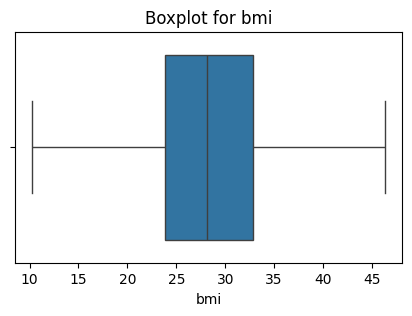

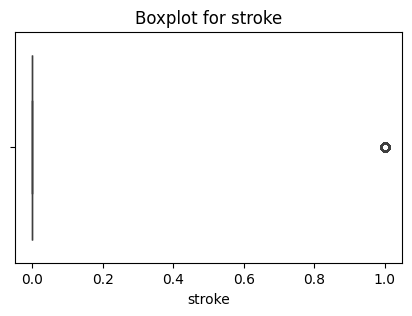

In [20]:
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [21]:
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_counts[col] = count

print(outlier_counts)

{'age': 0, 'hypertension': 498, 'heart_disease': 276, 'avg_glucose_level': 0, 'bmi': 0, 'stroke': 249}


In [22]:
#LabelEncoder('gender','ever_married','Residence_type')
#noe hot encoder('smoking_status','work_type')

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['gender','ever_married','Residence_type']:
    df[col] = le.fit_transform(df[col])

In [24]:
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=False)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   Residence_type                  5110 non-null   int64  
 6   avg_glucose_level               5110 non-null   float64
 7   bmi                             5110 non-null   float64
 8   stroke                          5110 non-null   int64  
 9   work_type_Govt_job              5110 non-null   bool   
 10  work_type_Never_worked          5110 non-null   bool   
 11  work_type_Private               5110 non-null   bool   
 12  work_type_Self-employed         511

<Axes: >

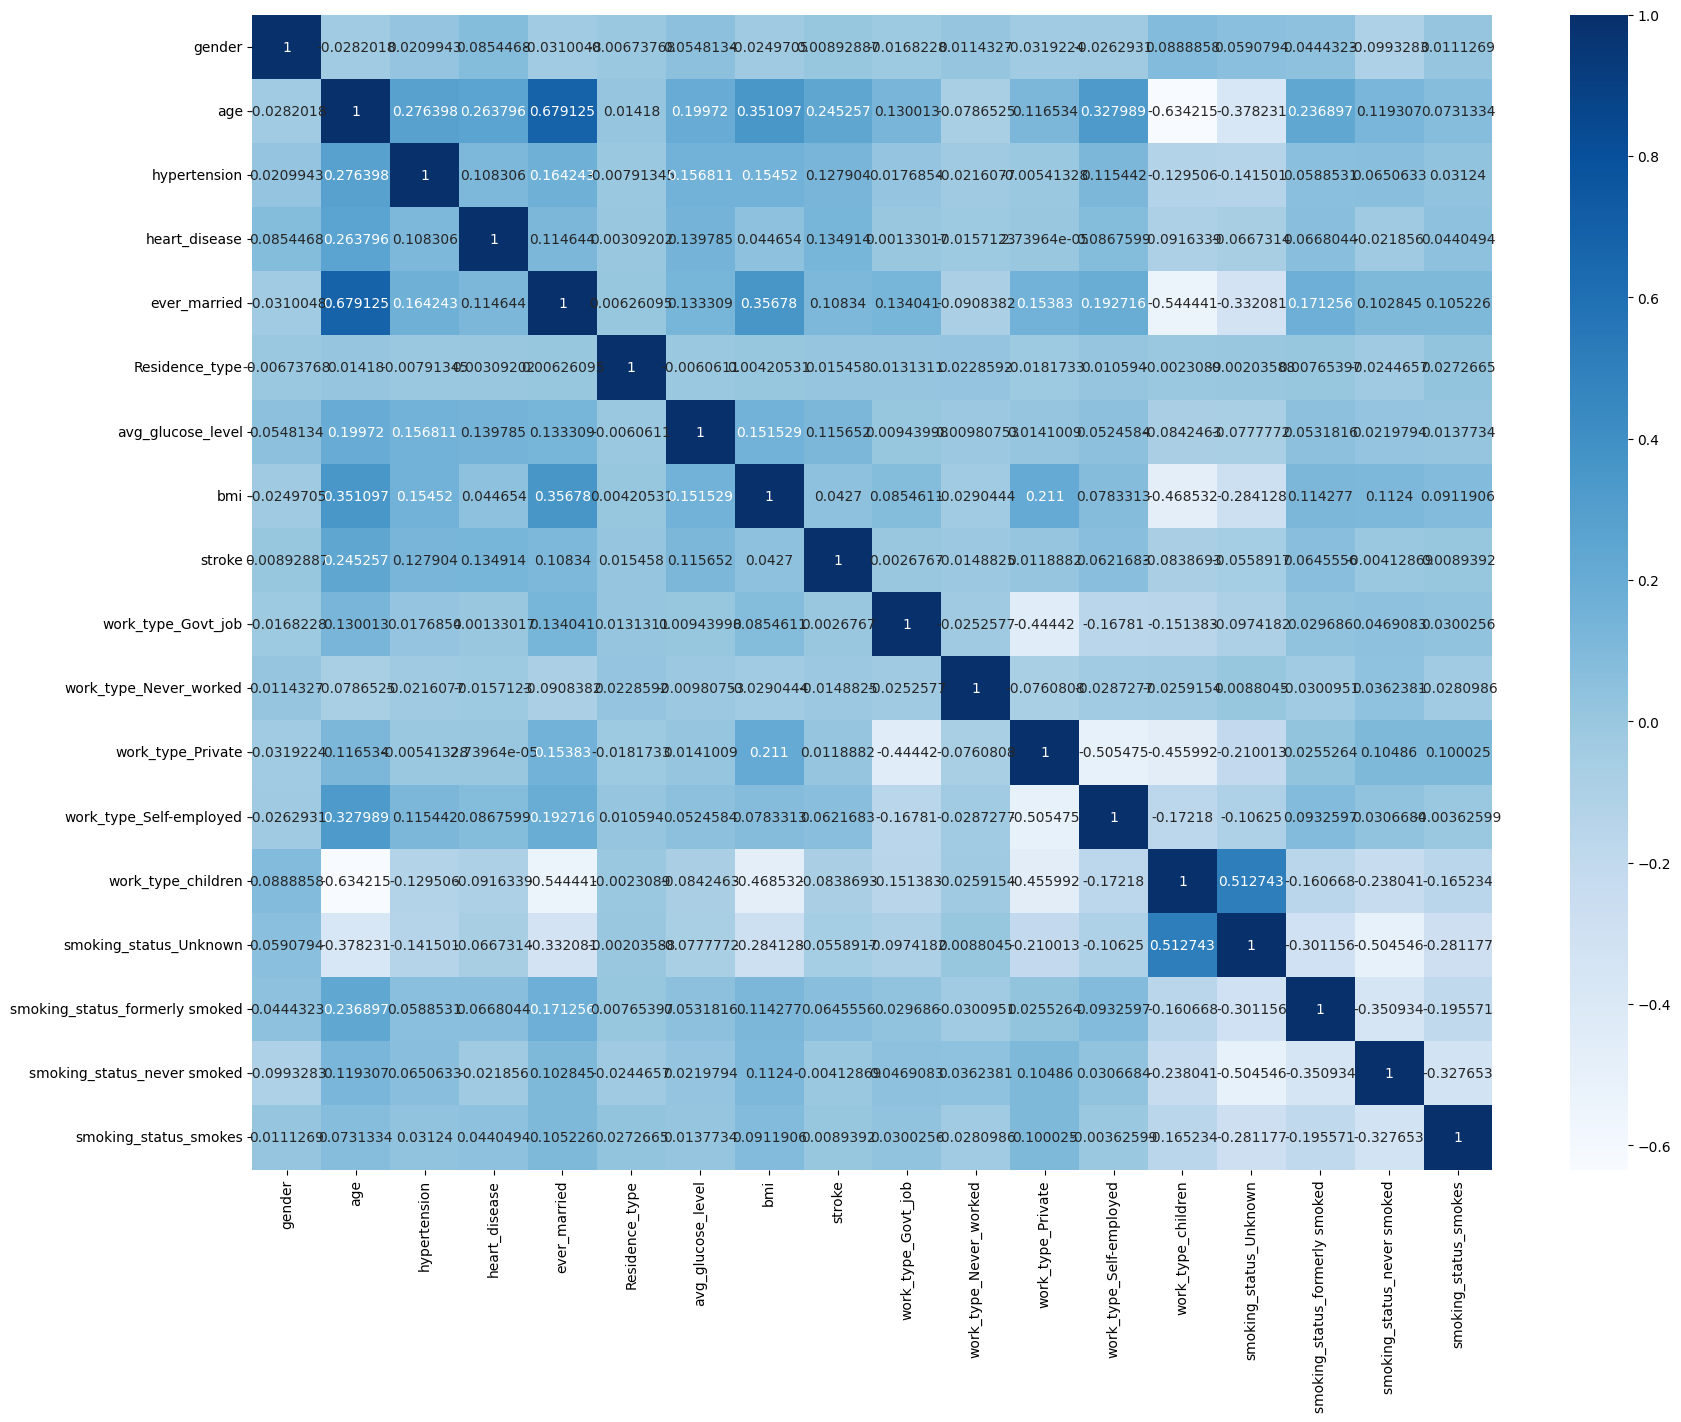

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues',fmt='g')

In [27]:
df.shape

(5110, 18)

In [28]:
print(df['stroke'].unique())

[1 0]


In [29]:
X = df.drop('stroke',axis=1)
y = df['stroke']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (4088, 17)
Testing data: (1022, 17)


In [31]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


num_cols = X.select_dtypes(include=['int64', 'float64']).columns


X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

In [33]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB,ComplementNB,MultinomialNB,CategoricalNB,BernoulliNB

# تعريف النماذج
models = {
    #"Logistic Regression": LogisticRegression(max_iter=1000),
    #"KNN Classifier": KNeighborsClassifier(n_neighbors=7),

   "GaussianNB": GaussianNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),

}

# تدريب وتقييم كل موديل
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # حساب المقاييس
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    # الطباعة المنسقة
    print(f"\n📘 Model: {name}")
    print("=" * 60)
    print(f"🔹 Accuracy : {acc:.4f}")
    print(f"🔹 Precision: {prec:.4f}")
    print(f"🔹 Recall   : {rec:.4f}")
    print(f"🔹 F1 Score : {f1:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print("=" * 60)
    


📘 Model: GaussianNB
🔹 Accuracy : 0.3395
🔹 Precision: 0.9444
🔹 Recall   : 0.3395
🔹 F1 Score : 0.4395

Confusion Matrix:
[[285 675]
 [  0  62]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.30      0.46       960
           1       0.08      1.00      0.16        62

    accuracy                           0.34      1022
   macro avg       0.54      0.65      0.31      1022
weighted avg       0.94      0.34      0.44      1022


📘 Model: ComplementNB
🔹 Accuracy : 0.6556
🔹 Precision: 0.9277
🔹 Recall   : 0.6556
🔹 F1 Score : 0.7451

Confusion Matrix:
[[621 339]
 [ 13  49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.65      0.78       960
           1       0.13      0.79      0.22        62

    accuracy                           0.66      1022
   macro avg       0.55      0.72      0.50      1022
weighted avg       0.93      0.66      0.75      1022


📘 Model: 

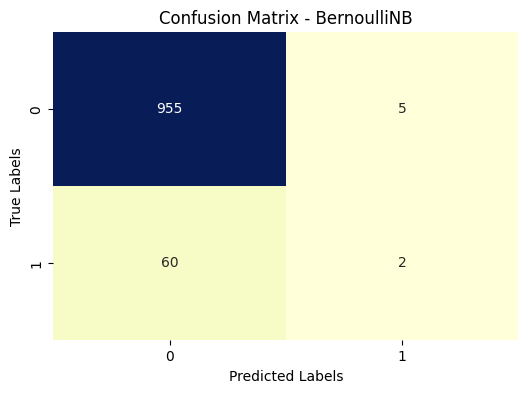

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()